<a href="https://colab.research.google.com/github/robisz1911/Analysis-of-TFT-game-results/blob/main/data_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request

print('Beginning file download with urllib2...')

url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
urllib.request.urlretrieve(url, 'owid-covid-data.csv')

Beginning file download with urllib2...


('owid-covid-data.csv', <http.client.HTTPMessage at 0x7f96d6d07050>)

In [2]:
!ls

owid-covid-data.csv  sample_data


In [29]:
import pandas as pd

covid_df = pd.read_csv('owid-covid-data.csv')

In [30]:
covid_df_europe = covid_df[covid_df['continent'] == 'Europe']

In [31]:
feature_names = covid_df_europe.columns
locations = covid_df_europe.location.unique()
continents = covid_df_europe.continent.unique()

In [35]:
def count_occurance_for_location(location):
  return (covid_df_europe.location == location).sum()

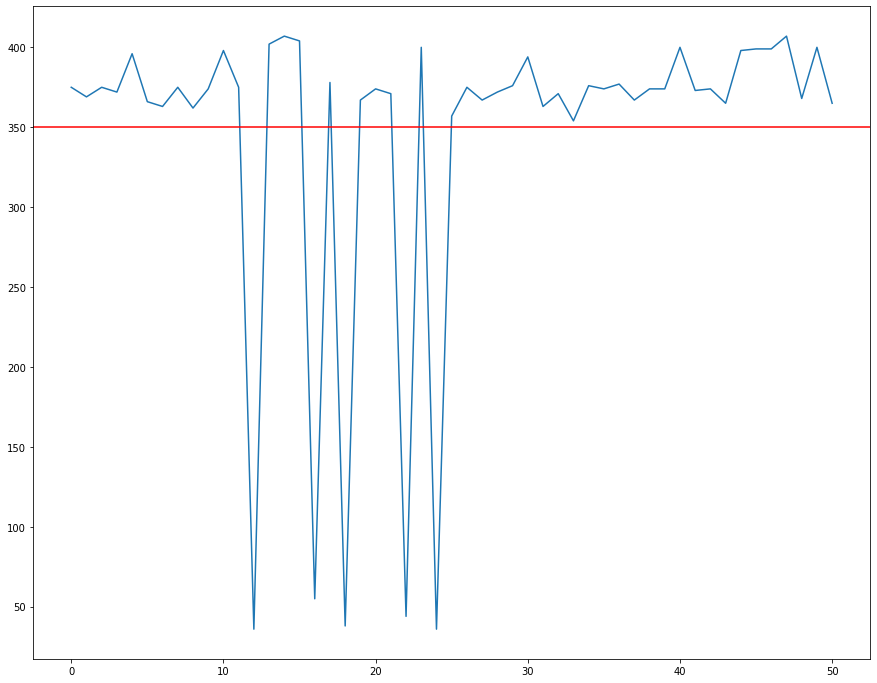

In [44]:
occurance_values = []
for location in locations:
  occurance_tmp = count_occurance_for_location(location)
  #print(location,occurance_tmp)
  occurance_values.append(occurance_tmp)

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 12))
plt.plot(occurance_values)
plt.axhline(y=350, color='r', linestyle='-')
plt.show()

In [52]:
cut_out_locations = []
for location in locations:
  occurance_tmp = count_occurance_for_location(location)
  #print(location,occurance_tmp)
  if occurance_tmp < 350:
    cut_out_locations.append(location)
print(cut_out_locations)

['Faeroe Islands', 'Gibraltar', 'Guernsey', 'Isle of Man', 'Jersey']


In this case I wanna to analyse the bigger countries, so let's just cut out locations with low amount of data available. There is 5 of them. ['Faeroe Islands', 'Gibraltar', 'Guernsey', 'Isle of Man', 'Jersey']

In [59]:
print(covid_df_europe.shape)
covid_df_europe_main = covid_df_europe[covid_df_europe['location'] != ('Faeroe Islands' or 'Gibraltar' or 'Guernsey' or 'Isle of Man' or 'Jersey')]
print(covid_df_europe_main.shape)


(17631, 59)
(17595, 59)


In [61]:
print('Faeroe Islands' in covid_df_europe_main.location.unique())

False


Let's work with big europe locations now. Preprocess the data for analysis.